# 1D Convection diffusion equation (Central Difference)

$$\frac{d}{d x}\left(\rho u\phi \right)=\frac{d}{d x}\left(\Gamma \frac{d \phi}{d x}\right)$$

Solution:
$$T_P=\frac{(a_E T_E+a_W T_w)}{a_P}$$

where,

$a_E=D_e-\frac{F_e}{2}$

$a_W=D_w+\frac{F_e}{2}$

$a_P=a_E+a_W$

$D_e=\Gamma/dx$

$D_w=\Gamma/dx$

$F_e=\rho_e u_e$

$F_w=\rho_w u_w$



Boundary Conditions:
                  
$\phi(x=0)=1$, $\phi(x=Lx)=0$

Domain: $Lx=1$ m

velocity: $u_e=u_w=u=5$ m/s (Because at this value the Peclet Number is 1)

Peclet Number:

$Pe=\frac{\rho u h}{\Gamma}$

Density: $\rho_e=\rho_w=\rho=1$ kg/m$^3$

Diffusion coefficient: $\Gamma_e=\Gamma_w=\Gamma=0.01$ kg/m-s


The Peclet number is:  -1.5999999999999999
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
Final iteration=  11


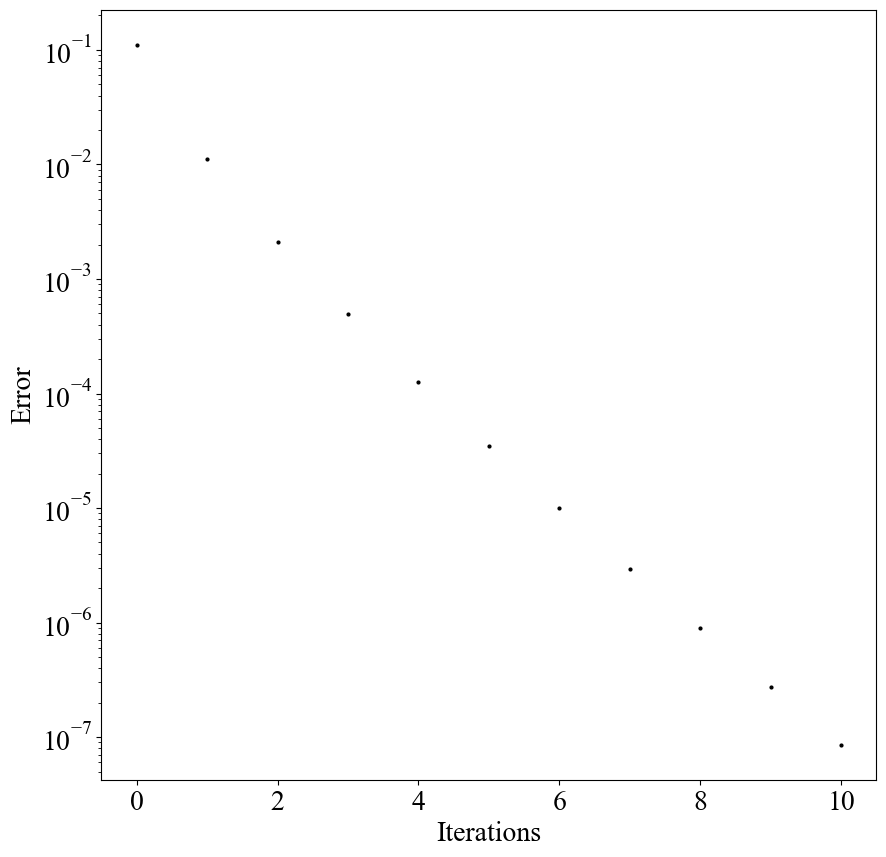

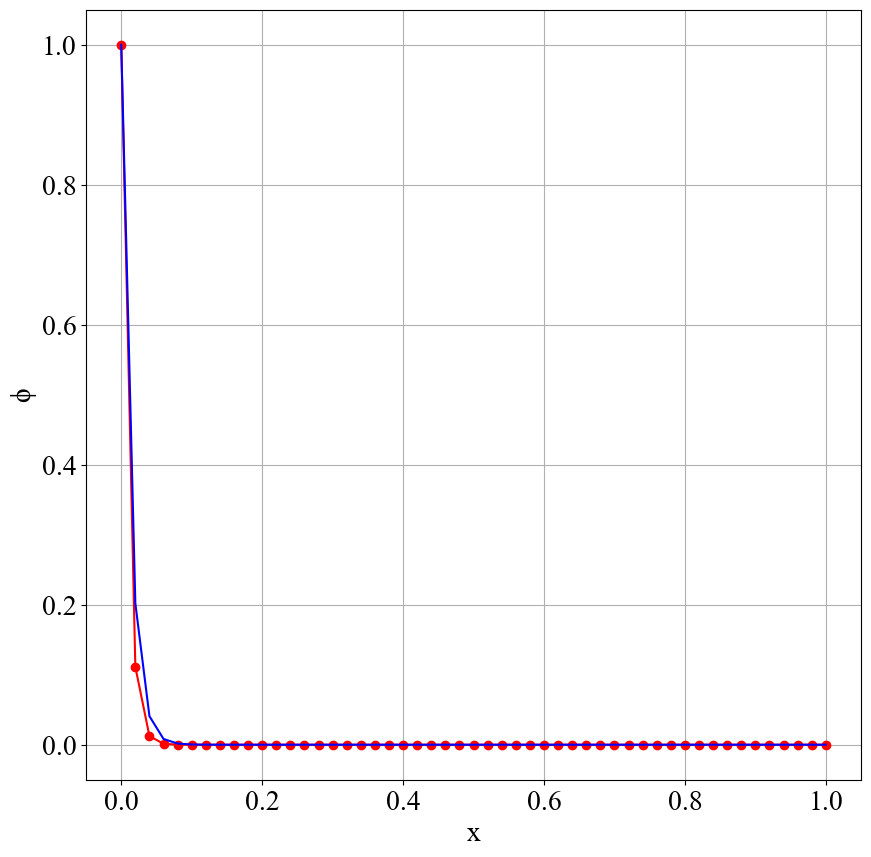

In [43]:
from numpy import *
from pylab import *
font = {'family' : 'Times New Roman','size'   : 20}
rc('font', **font)

# Physical Domain
#`````````````````
Lx=1.0

# Number of nodes
#`````````````````
nx=51

# dimension of FV Cell
#`````````````````````
dx=float64(Lx/(nx-1))

# Mesh/Grid Creating
#````````````````````
x=linspace(0,1,nx)

# Material, flow and Grid property (Assumed to be uniform)
#``````````````````````````````````````````````````````````
u_e=float64(-8.0)
u_w=float64(-8.0)
Γ_e=float64(0.1)
Γ_w=float64(0.1)
ρ_e=float64(1.0)
ρ_w=float64(1.0)


# Peclet number
#````````````````
Peclet=(ρ_w*u_w*dx)/Γ_w
print('The Peclet number is: ', Peclet)

#Mass flow rate per unit area and Diffusion conductance
#```````````````````````````````````````````````````````
F_e=float64(ρ_e*u_e)
F_w=float64(ρ_w*u_w)
D_e=float64(Γ_e/dx)
D_w=float64(Γ_w/dx)

a_E=D_e-F_e/2.0
a_W=D_w+F_w/2.0
a_P=a_E+a_W

# Initial Guess and array creation
#``````````````````````````````````
ϕ=zeros(nx)

# Boundary conditions
#`````````````````````
ϕ[0]=1
ϕ[-1]=0
print(ϕ)

# Copying old to new array for comparison and updation
#``````````````````````````````````````````````````````
ϕ_new=ϕ.copy()

# Solving governing equation for the interior cells
#```````````````````````````````````````````````````
count=0
error=1
ϵ=0.0000001
while error>ϵ:
    for i in range(1,nx-1):
             
        ϕ_new[i]=(a_E*ϕ_new[i+1]+a_W*ϕ_new[i-1])/a_P
    
    # Evaluation error for current iteration
    #````````````````````````````````````````
    error=sum(abs(ϕ_new-ϕ))
    
    # Plotting error
    #```````````````
    figure(10,figsize=(10,10))
    semilogy(count,error,'k-o',markersize=2)
    xlabel('Iterations')
    ylabel('Error')
    
    # Count incrementing
    #```````````````````
    count=count+1
    if count%500==0:
        print(count)
    
    # Updating ϕ 
    #````````````
    ϕ=ϕ_new.copy()

print('Final iteration= ',count)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# Plotting and comparing numerical result with exact solution #
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

Pe_x=(ρ_e*u_e*x)/Γ_e
Pe_L=Pe_x[-1]
exact=ϕ[0]+(ϕ[-1]-ϕ[0])*((exp(Pe_x)-1)/(exp(Pe_L)-1))
figure(20,figsize=(10,10))
plot(x,ϕ,'r-o')
plot(x,exact,'b')
xlabel('x')
ylabel('ϕ')
grid()
show()